In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import ast
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

patient = pd.read_csv('/Volumes/Samsung USB/CombinedData/combined1.csv')
allergies = pd.read_csv('/Volumes/Samsung USB/synthea_1m_fhir_3_0_May_24/output_1/csv/allergies.csv')
immunizations = pd.read_csv('/Volumes/Samsung USB/synthea_1m_fhir_3_0_May_24/output_1/csv/immunizations.csv')
conditions = pd.read_csv('/Volumes/Samsung USB/synthea_1m_fhir_3_0_May_24/output_1/csv/conditions.csv')
medications = pd.read_csv('/Volumes/Samsung USB/synthea_1m_fhir_3_0_May_24/output_1/csv/medications.csv')
encounters = pd.read_csv('/Volumes/Samsung USB/synthea_1m_fhir_3_0_May_24/output_1/csv/encounters.csv')
careplans = pd.read_csv('/Volumes/Samsung USB/synthea_1m_fhir_3_0_May_24/output_1/csv/careplans.csv')
patient.head()


,ID,BIRTHDATE,DEATHDATE,PASSPORT,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ZIP,...,ALLERGIES_CODE,IMMUNIZATIONS_CODE,CAREPLANS_CODE,CAREPLANS_REASONCODE,BODY_WEIGHT,BODY_HEIGHT,BMI,SYSTOLIC_BP,DIASTOLIC_BP,OBSERVATIONS_CODE
0,660bec03-9e58-47f2-98b9-2f1c564f3838,1996-07-26,NaN,false,NaN,white,irish,F,Fitchburg MA US,20810.0,...,NaN,"[140, 140, 140, 114, 140, 140, 140, 140]","[872781000000100, 266694003, 183051005, 539500...","[39848009.0, 39848009.0, 39848009.0, 10509002....",73.54,163.07,27.66,101.0,75.0,"['8302-2', '29463-7', '39156-5', '8480-6', '84..."
1,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,1996-09-24,NaN,false,NaN,white,french_canadian,F,Westborough MA US,2638.0,...,"[91930004, 419263009, 424213003]","[140, 62, 140, 140, 114, 140, 140, 140, 140]","[326051000000105, 409002, 58332002, 3260510000...","[nan, nan, nan, nan, nan, nan, nan]",17.33,95.92,18.84,137.0,89.0,"['8302-2', '29463-7', '39156-5', '8480-6', '84..."
2,26626faf-cbd5-48d5-a3bf-a7b21ae08e4b,1944-09-01,2015-09-04,X19963891X,M,white,irish,M,Fall River MA US,23401.0,...,NaN,"[133, 140, 33, 140, 140, 140, 140]","[133901003, 385949008, 440381005, 439830001, 3...","[403190006.0, 403190006.0, 403190006.0, 403190...",74.58,174.14,24.60,111.0,71.0,"['8302-2', '29463-7', '39156-5', '8480-6', '84..."
3,eed62b4a-1099-47ec-a2ac-d953830b44d6,1965-08-05,NaN,false,M,hispanic,central_american,M,Shrewsbury MA US,2631.0,...,NaN,"[140, 140, 140, 113]",NaN,NaN,113.23,164.74,41.72,131.0,86.0,"['8302-2', '29463-7', '39156-5', '8480-6', '84..."
4,6e9f8b3e-5a21-401e-868d-2d62e0e7f452,1979-11-03,NaN,X29737332X,M,white,irish,F,Wilmington MA US,2630.0,...,[300913006],"[140, 113, 140]","[326051000000105, 409002, 58332002, 3260510000...","[nan, nan, nan, nan, nan, 72892002.0, 72892002...",106.81,166.13,38.70,131.0,74.0,"['8302-2', '29463-7', '39156-5', '8480-6', '84..."


In [9]:
patient.drop(columns=['CONDITIONS_CODE','MEDICATIONS_CODE','MEDICATIONS_REASONCODE','ENCOUNTERS_CODE','ENCOUNTERS_REASONCODE','ALLERGIES_CODE', 'IMMUNIZATIONS_CODE', 'CAREPLANS_CODE', 'CAREPLANS_REASONCODE', 'OBSERVATIONS_CODE'], inplace=True)
patient.shape

(104597, 15)

In [10]:
conditions.drop(columns=['START', 'STOP', 'ENCOUNTER', 'DESCRIPTION'], inplace=True)
conditions.shape

(483462, 2)

In [11]:
medications.drop(columns=['START', 'STOP', 'ENCOUNTER', 'DESCRIPTION', 'REASONDESCRIPTION'], inplace=True)
medications.shape

(397877, 3)

In [12]:
immunizations.drop(columns=['DATE', 'ENCOUNTER', 'DESCRIPTION'], inplace=True)
immunizations.shape

(873133, 2)

In [13]:
allergies.drop(columns=['START', 'STOP', 'ENCOUNTER', 'DESCRIPTION'], inplace=True)
allergies.shape

(51739, 2)

In [14]:
encounters.drop(columns=['DATE', 'ID', 'DESCRIPTION', 'REASONDESCRIPTION'], inplace=True)
encounters.shape

(1263669, 3)

In [15]:
careplans.drop(columns=['ID', 'START', 'STOP', 'ENCOUNTER', 'DESCRIPTION', 'REASONDESCRIPTION'], inplace=True)
careplans.shape

(796057, 3)

In [16]:
patient.isna().sum()

ID                  0
BIRTHDATE           0
DEATHDATE       97023
PASSPORT            0
MARITAL         32230
RACE               37
ETHNICITY          19
GENDER             35
BIRTHPLACE         28
ZIP               113
BODY_WEIGHT         0
BODY_HEIGHT         0
BMI                 0
SYSTOLIC_BP         0
DIASTOLIC_BP        0
dtype: int64

In [17]:
columns_to_fill_with_mode = ['RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ZIP']

for column in columns_to_fill_with_mode:
    mode_value = patient[column].mode()[0]
    patient[column].fillna(mode_value, inplace=True)
    
patient['MARITAL'] = patient['MARITAL'].fillna('S')
patient['DEATHDATE'] = patient['DEATHDATE'].fillna('False')
patient.isna().sum()


ID              0
BIRTHDATE       0
DEATHDATE       0
PASSPORT        0
MARITAL         0
RACE            0
ETHNICITY       0
GENDER          0
BIRTHPLACE      0
ZIP             0
BODY_WEIGHT     0
BODY_HEIGHT     0
BMI             0
SYSTOLIC_BP     0
DIASTOLIC_BP    0
dtype: int64

In [18]:
patient.head()

,ID,BIRTHDATE,DEATHDATE,PASSPORT,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ZIP,BODY_WEIGHT,BODY_HEIGHT,BMI,SYSTOLIC_BP,DIASTOLIC_BP
0,660bec03-9e58-47f2-98b9-2f1c564f3838,1996-07-26,False,false,S,white,irish,F,Fitchburg MA US,20810.0,73.54,163.07,27.66,101.0,75.0
1,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,1996-09-24,False,false,S,white,french_canadian,F,Westborough MA US,2638.0,17.33,95.92,18.84,137.0,89.0
2,26626faf-cbd5-48d5-a3bf-a7b21ae08e4b,1944-09-01,2015-09-04,X19963891X,M,white,irish,M,Fall River MA US,23401.0,74.58,174.14,24.60,111.0,71.0
3,eed62b4a-1099-47ec-a2ac-d953830b44d6,1965-08-05,False,false,M,hispanic,central_american,M,Shrewsbury MA US,2631.0,113.23,164.74,41.72,131.0,86.0
4,6e9f8b3e-5a21-401e-868d-2d62e0e7f452,1979-11-03,False,X29737332X,M,white,irish,F,Wilmington MA US,2630.0,106.81,166.13,38.70,131.0,74.0


In [19]:
column_name1 = 'RACE'
valid_race_values = ['white', 'hispanic', 'black', 'asian', 'native']

# Replace any values not in the valid list with a default value (e.g., 'other')
patient[column_name1] = patient[column_name1].apply(lambda x: x if x in valid_race_values else 'other')

# Calculate value counts
value_counts = patient[column_name1].value_counts().reset_index()

# Assign column names to the DataFrame
value_counts.columns = ['Unique_Value', 'Count']

# Display the entire DataFrame without truncation
pd.set_option('display.max_rows', None)
with pd.option_context('display.max_rows', None):
    print(value_counts)

  Unique_Value  Count
0        white  80580
1     hispanic  10216
2        black   7734
3        asian   6005
4        other     59
5       native      3


In [20]:
column_name2 = 'ETHNICITY'
# Get the number of occurrences of each unique value in the specified column
valid_ethnicity_values = ['irish', 'italian', 'english', 'french', 'puerto_rican', 'german', 'polish', 'portuguese',
                'chinese', 'american', 'french_canadian', 'african', 'dominican', 'asian_indian', 'scottish',
                'swedish', 'russian', 'west_indian', 'mexican', 'central_american']

# Replace any values not in the valid list with a default value (e.g., 'other')
patient[column_name2] = patient[column_name2].apply(lambda x: x if x in valid_ethnicity_values else 'other')

# Calculate value counts
value_counts = patient[column_name2].value_counts().reset_index()

# Assign column names to the DataFrame
value_counts.columns = ['Unique_Value', 'Count']

# Display the entire DataFrame without truncation
with pd.option_context('display.max_rows', None):
    print(value_counts)

        Unique_Value  Count
0              irish  21432
1            italian  13165
2            english  10408
3             french   7482
4       puerto_rican   7265
5             german   5647
6             polish   4741
7         portuguese   4567
8            chinese   4027
9           american   3805
10   french_canadian   3727
11           african   3114
12         dominican   3049
13      asian_indian   1978
14          scottish   1929
15           swedish   1896
16           russian   1759
17       west_indian   1571
18           mexican   1485
19  central_american   1466
20             other     84


In [21]:
column_name = 'PASSPORT'

# Change values to True if not already False
patient[column_name] = patient[column_name].apply(lambda x: x.lower() != 'false')
patient.head()

,ID,BIRTHDATE,DEATHDATE,PASSPORT,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ZIP,BODY_WEIGHT,BODY_HEIGHT,BMI,SYSTOLIC_BP,DIASTOLIC_BP
0,660bec03-9e58-47f2-98b9-2f1c564f3838,1996-07-26,False,False,S,white,irish,F,Fitchburg MA US,20810.0,73.54,163.07,27.66,101.0,75.0
1,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,1996-09-24,False,False,S,white,french_canadian,F,Westborough MA US,2638.0,17.33,95.92,18.84,137.0,89.0
2,26626faf-cbd5-48d5-a3bf-a7b21ae08e4b,1944-09-01,2015-09-04,True,M,white,irish,M,Fall River MA US,23401.0,74.58,174.14,24.60,111.0,71.0
3,eed62b4a-1099-47ec-a2ac-d953830b44d6,1965-08-05,False,False,M,hispanic,central_american,M,Shrewsbury MA US,2631.0,113.23,164.74,41.72,131.0,86.0
4,6e9f8b3e-5a21-401e-868d-2d62e0e7f452,1979-11-03,False,True,M,white,irish,F,Wilmington MA US,2630.0,106.81,166.13,38.70,131.0,74.0


In [22]:
columns_to_normalize = ['RACE', 'ETHNICITY', 'PASSPORT', 'BIRTHPLACE'] 

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
patient[columns_to_normalize] = patient[columns_to_normalize].apply(label_encoder.fit_transform)

/Users/dakariantoine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dakariantoine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/dakariantoine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dakariantoine/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [23]:
patient['MARITAL'] = patient['MARITAL'].apply(lambda x: 0 if x == 'S' else 1)

# Map 'M' to 1 and 'F' to 0 in the 'GENDER' column
patient['GENDER'] = patient['GENDER'].apply(lambda x: 0 if x == 'F' else 1)
patient.head()

,ID,BIRTHDATE,DEATHDATE,PASSPORT,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ZIP,BODY_WEIGHT,BODY_HEIGHT,BMI,SYSTOLIC_BP,DIASTOLIC_BP
0,660bec03-9e58-47f2-98b9-2f1c564f3838,1996-07-26,False,0,0,5,10,0,119,20810.0,73.54,163.07,27.66,101.0,75.0
1,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,1996-09-24,False,0,0,5,8,0,363,2638.0,17.33,95.92,18.84,137.0,89.0
2,26626faf-cbd5-48d5-a3bf-a7b21ae08e4b,1944-09-01,2015-09-04,1,1,5,10,1,117,23401.0,74.58,174.14,24.60,111.0,71.0
3,eed62b4a-1099-47ec-a2ac-d953830b44d6,1965-08-05,False,0,1,2,3,1,304,2631.0,113.23,164.74,41.72,131.0,86.0
4,6e9f8b3e-5a21-401e-868d-2d62e0e7f452,1979-11-03,False,1,1,5,10,0,377,2630.0,106.81,166.13,38.70,131.0,74.0


In [24]:
allergies.isna().sum()

PATIENT    0
CODE       0
dtype: int64

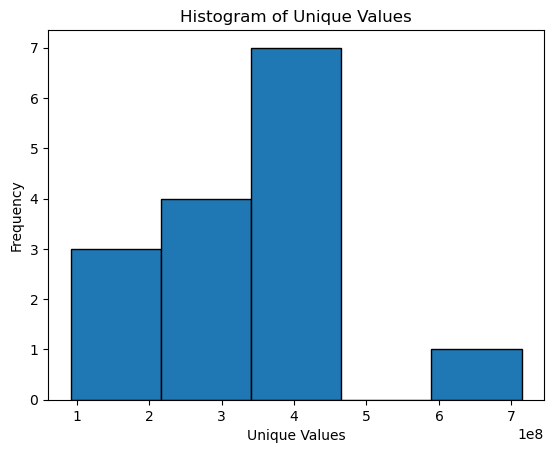

In [25]:
plt.hist(allergies['CODE'].unique(), bins='auto', edgecolor='black')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

In [26]:
conditions.isna().sum()

PATIENT    0
CODE       0
dtype: int64

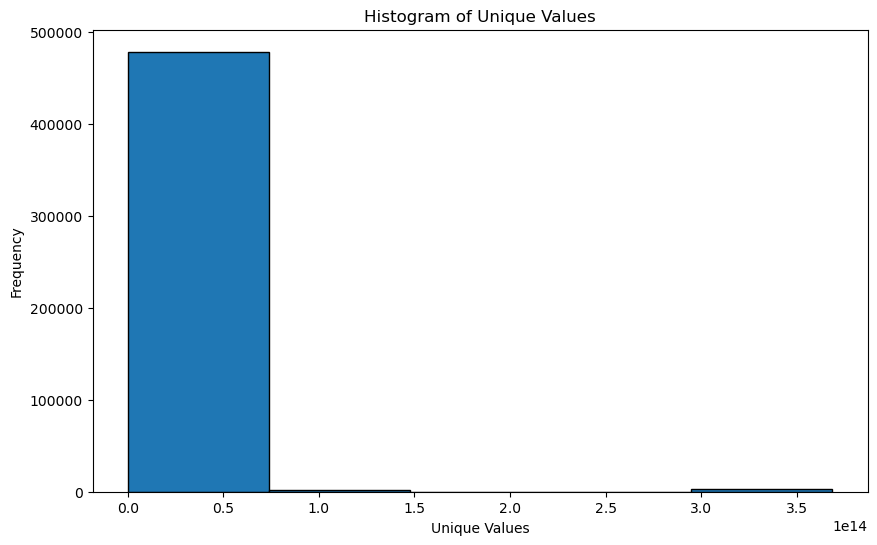

In [27]:
value_counts = conditions['CODE'].value_counts()

num_bins = 5

plt.figure(figsize=(10, 6))
plt.hist(value_counts.index, bins=num_bins, edgecolor='black', weights=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

In [28]:
medications.fillna(0, inplace=True)
medications.isna().sum()

PATIENT       0
CODE          0
REASONCODE    0
dtype: int64

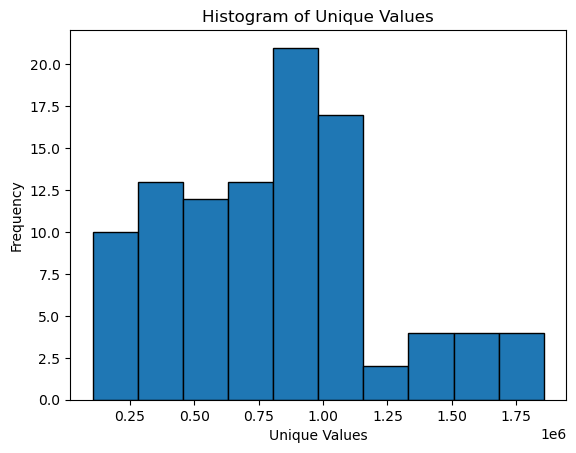

In [29]:
plt.hist(medications['CODE'].unique(), bins='auto', edgecolor='black')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

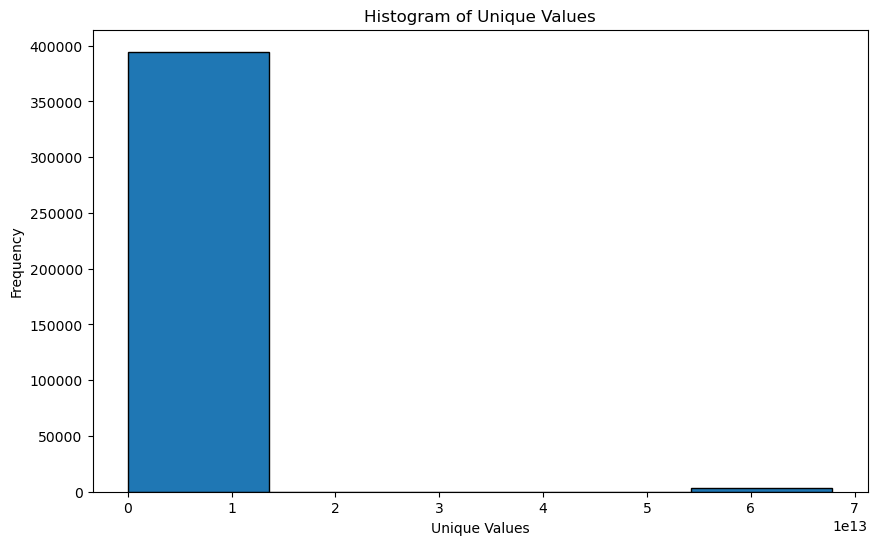

In [30]:
value_counts = medications['REASONCODE'].value_counts()

num_bins = 5

plt.figure(figsize=(10, 6))
plt.hist(value_counts.index, bins=num_bins, edgecolor='black', weights=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

In [31]:
immunizations.isna().sum()

PATIENT    0
CODE       0
dtype: int64

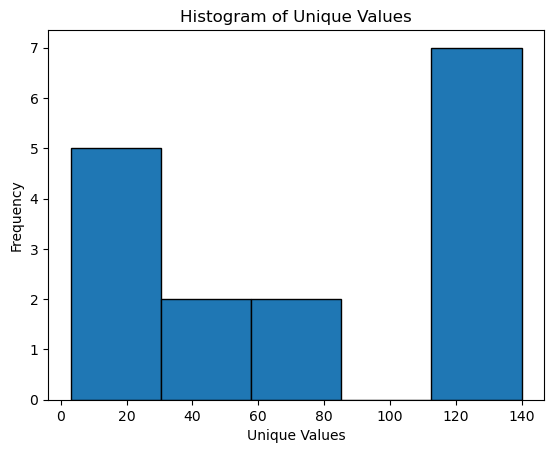

In [32]:
plt.hist(immunizations['CODE'].unique(), bins='auto', edgecolor='black')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

In [33]:
encounters.fillna(0, inplace=True)
encounters.isna().sum()

PATIENT       0
CODE          0
REASONCODE    0
dtype: int64

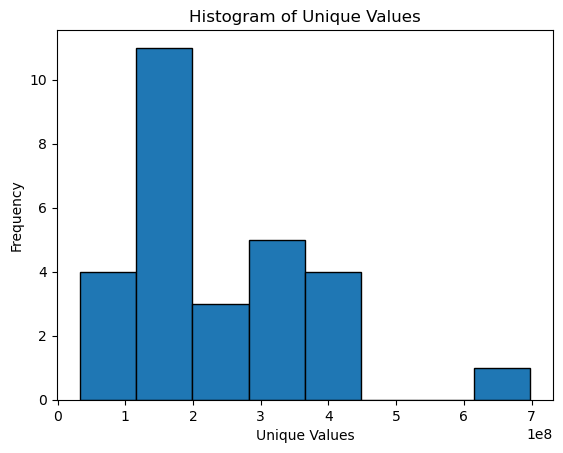

In [34]:
plt.hist(encounters['CODE'].unique(), bins='auto', edgecolor='black')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

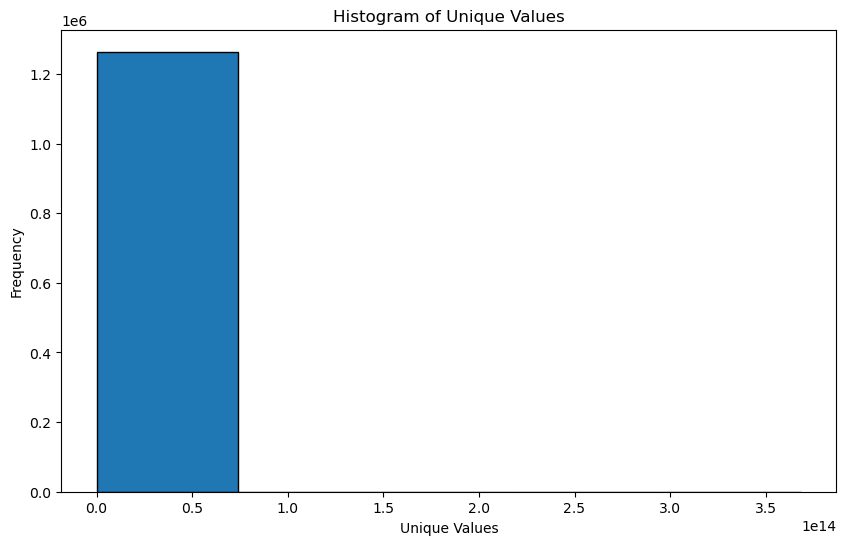

In [35]:
value_counts = encounters['REASONCODE'].value_counts()

num_bins = 5

plt.figure(figsize=(10, 6))
plt.hist(value_counts.index, bins=num_bins, edgecolor='black', weights=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

In [36]:
careplans.fillna(0, inplace=True)
careplans.isna().sum()

PATIENT       0
CODE          0
REASONCODE    0
dtype: int64

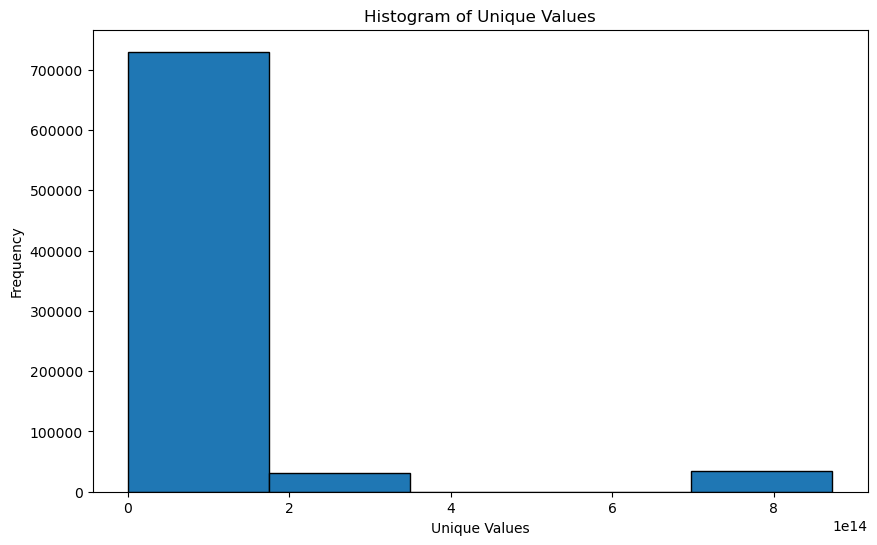

In [37]:
value_counts = careplans['CODE'].value_counts()

num_bins = 5

plt.figure(figsize=(10, 6))
plt.hist(value_counts.index, bins=num_bins, edgecolor='black', weights=value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Histogram of Unique Values')
plt.show()

In [ ]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
numeric_columns = patient.select_dtypes(include=['number'])

sns.pairplot(numeric_columns)
plt.show()

In [ ]:
numeric_columns = patient.select_dtypes(include=['number'])
sns.scatterplot(data=numeric_columns)
plt.show()

In [ ]:
corr_matrix = numeric_columns.corr() 
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1)

In [ ]:
dfs = [conditions, allergies, medications, immunizations, encounters, careplans]
prefixes = ['conditions_', 'allergies_', 'medications_', 'immunizations_', 'encounters_', 'careplans_']

# Add prefixes to column names
for df, prefix in zip(dfs, prefixes):
    df.columns = [f'{prefix}{col}' for col in df.columns]

In [ ]:
combined_df = pd.concat(dfs, axis=1)
merged_df = pd.merge(patient, combined_df, left_on='ID', right_on='conditions_PATIENT', how='outer')
numeric_columns = merged_df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.scatterplot(data=numeric_columns)
plt.show()